### Libraries

In [1]:
import numpy as np
from scipy import spatial

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Hyperparameters

In [3]:
k = 2 
l = 10
n_verts = 120

### Create Affinity Matrix

In [4]:
data = np.load('/home/zz452/cluster/data/modelTishby_0_layer_data.p')
layer = data[-2] 
n_epochs, n_sample, n_dim = layer.shape
points = layer[50,:,:]

dist_thrshld = 0.01
M_d = spatial.distance_matrix(points,
                              points,
                              p=2)**2
mask = M_d<dist_thrshld
remove_diag = np.eye(n_sample)==0
mask = remove_diag*mask

stay_prob = np.eye(n_sample)*0.5
d = mask.sum(0).max()
move_prob = 1/(2*d)

M = move_prob*mask + stay_prob
add_self_loop = np.diag(1-M.sum(0))
M = M + add_self_loop
M = M.astype('float32')

### Random Sample of Vertices

In [6]:
# create a mask so that we dont sample verteces that are not connected to anything 
singles_mask = mask.sum(0)>0
singles_mask = singles_mask.reshape(-1,1)

#total number of vertices that are connected (not to itself)
n = (mask.sum(0) > 0).sum() 

S = np.random.random_sample((M.shape[1], 
                             n_verts))
S = S*singles_mask
S = (S.max(axis=0,keepdims=1) == S)*1
S = S.astype('float32')

### Random Walk

In [7]:
M_l = np.linalg.matrix_power(M, l)
S_l = np.matmul(M_l, S)
p_l2 = np.linalg.norm(S_l, ord=2, axis=0)**2
sigma = 192*n_verts*k/n
keep_idx = p_l2<sigma

'''
TODO: put a function that sample more vertices if it doesnt pass the sigma test'
【・ヘ・】
'''
assert len(keep_idx)==n_verts, 'Sample more vertices, didnt pass sigma test'

### Similarlity Graph

In [18]:
H = spatial.distance_matrix(np.swapaxes(S_l,0,1),
                            np.swapaxes(S_l,0,1),
                            p=2)**2
remove_diag = np.eye(n_verts)*9999
H = H+remove_diag
H = H<=1/(4*n)

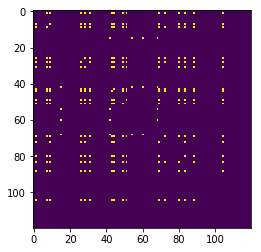

In [19]:
plt.imshow(H)